DescribeResult(nobs=10000, minmax=(21.552965885927513, 537.0060589651561), mean=108.57629971396803, variance=2701.8086621709567, skewness=1.570534491631573, kurtosis=4.215055442566059)
DescribeResult(nobs=10000, minmax=(0.17007733160178362, 0.3180063395092135), mean=0.24320434743848238, variance=0.00041237332772971213, skewness=0.13972286847381685, kurtosis=-0.011299894428885793)


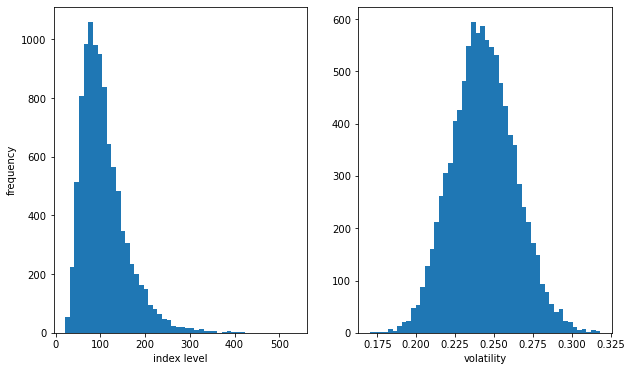

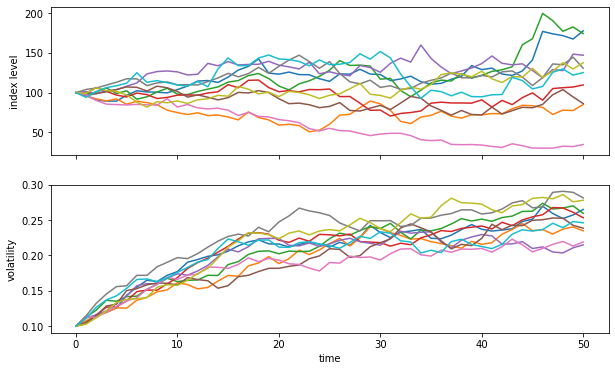

In [20]:
import scipy.stats as scs
import math
import numpy as np
import numpy.random as npr
from pylab import plt, mpl

S0 = 100.
r = 0.05
v0 = 0.1   #Initial (instantaneous) volatility value.
kappa = 3.0
theta = 0.25
sigma = 0.1
rho = 0.6    #Fixed CORRELATION between the two Brownian motions.
T = 1.0      #cunku scale'leri cok farkli iki random number serisi olduklari icin.
              #scale farkli olmasa covariance matrix de kullanabilirsin.

corr_mat = np.zeros((2, 2))
corr_mat[0, :] = [1.0, rho]
corr_mat[1, :] = [rho, 1.0]
cho_mat = np.linalg.cholesky(corr_mat) 

'''
Before the start of the simulation of the stochastic processes the whole set of random
numbers for both processes is generated, looking to use set 0 for the index process
and set 1 for the volatility process. For the volatility process modeled by a square-root
diffusion, the Euler scheme is chosen, taking into account the correlation via the
Cholesky matrix
'''

'''Volatility Process '''

M = 50
I = 10000
dt = T / M
ran_num = npr.standard_normal((2, M + 1, I))      #Generates the three-dimensional random number data set.
v = np.zeros_like(ran_num[0])
vh = np.zeros_like(v)
v[0] = v0
vh[0] = v0

for t in range(1, M + 1):
    ran = np.dot(cho_mat, ran_num[:, t, :])       #Picks out the relevant random number subset and transforms it via the Cholesky matrix.
    vh[t] = (vh[t - 1] + 
             kappa * (theta - np.maximum(vh[t - 1], 0)) * dt + 
             sigma * np.sqrt(np.maximum(vh[t - 1], 0)) *
             math.sqrt(dt) * ran[1])             #Simulates the paths based on an Euler scheme. vol icin ikinci satirdaki random numberlari aldik, birinciyi de alabilirdin.
                                                # as long as price icin diger satiri almak kosuluyla.
v = np.maximum(vh, 0)

''' Price Process'''

S = np.zeros_like(ran_num[0])
S[0] = S0
for t in range(1, M + 1):
    ran = np.dot(cho_mat, ran_num[:, t, :])
    S[t] = S[t - 1] * np.exp((r - 0.5 * v[t]) * dt +
                             np.sqrt(v[t]) * ran[0] * np.sqrt(dt))  #ran[0] dedik cunku vol icin 1' i kullandik.

'''
This illustrates another advantage of working with the Euler scheme for the square￾root diffusion: correlation is easily and consistently accounted for since one only draws
standard normally distributed random numbers. There is no simple way of achieving
the same with a mixed approach (i.e., using Euler for the index and the noncentral
chi-square-based exact approach for the volatility process)
'''
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
ax1.hist(S[-1], bins=50)
ax1.set_xlabel('index level')
ax1.set_ylabel('frequency')
ax2.hist(v[-1], bins=50)
ax2.set_xlabel('volatility');

'''
An inspection of the first 10 simulated paths of each process (see Figure 12-12) shows
that the volatility process is drifting positively on average and that it, as expected,
converges to θ = 0.25:

Having a brief look at the statistics for the maturity date for both data sets reveals a
pretty high maximum value for the index level process. In fact, this is much higher
than a geometric Brownian motion with constant volatility could ever climb, ceteris
paribus.

'''
print(scs.describe(S[-1]))
print(scs.describe(v[-1]))

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))
ax1.plot(S[:, :10], lw=1.5)
ax1.set_ylabel('index level')
ax2.plot(v[:, :10], lw=1.5) 
ax2.set_xlabel('time')
ax2.set_ylabel('volatility');
